In [72]:
import pandas as pd

In [73]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
air_quality = pd.read_csv('data/air_quality_long.csv', index_col='date.utc', parse_dates=True)
air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³


In [75]:
titanic.sort_values(by='Age').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


In [76]:
titanic.sort_values(by=['Pclass', 'Age'], ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S


In [77]:
no2 = air_quality[air_quality['parameter'] == 'no2']
no2.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


In [78]:
no2_subset = no2.sort_index().groupby(['location']).head(2)

In [79]:
no2_subset.pivot(columns="location", values="value")

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,22.5,24.4,NaN
2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2019-04-09 03:00:00+00:00,NaN,NaN,67.0


<AxesSubplot:xlabel='date.utc'>

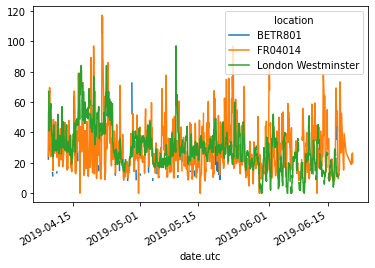

In [80]:
no2.pivot(columns="location", values="value").plot()

In [81]:
air_quality.pivot_table(values="value", index="location", columns="parameter", aggfunc="mean", margins=True)

parameter,no2,pm25,All
location,,,
BETR801,26.950920,23.169492,24.982353
FR04014,29.374284,NaN,29.374284
London Westminster,29.740050,13.443568,21.491708
All,29.430316,14.386849,24.222743


In [84]:
no2_pivoted = no2.pivot(columns="location", values="value").reset_index()
no2_pivoted.head()

location,date.utc,BETR801,FR04014,London Westminster
0,2019-04-09 01:00:00+00:00,22.5,24.4,NaN
1,2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2,2019-04-09 03:00:00+00:00,54.5,34.2,67.0
3,2019-04-09 04:00:00+00:00,34.5,48.5,41.0
4,2019-04-09 05:00:00+00:00,46.5,59.5,41.0


In [93]:
no_2 = no2_pivoted.melt(id_vars="date.utc", value_name="NO2", var_name="id_location", value_vars=['BETR801', 'FR04014', 'London Westminster'])
no_2.groupby('id_location').head()

,date.utc,id_location,NO2
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5
1705,2019-04-09 01:00:00+00:00,FR04014,24.4
1706,2019-04-09 02:00:00+00:00,FR04014,27.4
1707,2019-04-09 03:00:00+00:00,FR04014,34.2
1708,2019-04-09 04:00:00+00:00,FR04014,48.5
1709,2019-04-09 05:00:00+00:00,FR04014,59.5
